<a href="https://colab.research.google.com/github/RoshiEttehadi/AI-CNN-SKINCANCER/blob/main/Roshi_cnn_AI_skinCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install tensorflow
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
# Import required libraries
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import shutil
from google.colab import drive

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Define paths
DRIVE_BASE = '/content/gdrive/MyDrive'
DATA_PATH = os.path.join(DRIVE_BASE, 'datasets')
MODEL_PATH = os.path.join(DRIVE_BASE, 'models')

# Create necessary directories
os.makedirs(MODEL_PATH, exist_ok=True)

# Define dataset folders
benign_folder = os.path.join(DATA_PATH, 'ISIC-images-benign')
malignant_folder = os.path.join(DATA_PATH, 'ISIC-images-malignant')

# Function to count the number of images in a folder
def count_images(folder):
    return len([filename for filename in os.listdir(folder) if filename.endswith(".jpg") or filename.endswith(".png")])

# Count the number of images in each class
num_benign_images = count_images(benign_folder)
num_malignant_images = count_images(malignant_folder)

print(f"Number of benign images: {num_benign_images}")
print(f"Number of malignant images: {num_malignant_images}")


Mounted at /content/gdrive
Number of benign images: 988
Number of malignant images: 1008


In [ ]:
# Function to load and preprocess images from directory
def load_images(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith((".jpg", ".png")):
            image_path = os.path.join(image_dir, filename)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            image = tf.keras.preprocessing.image.img_to_array(image) / 255.0
            images.append(image)
            labels.append(label)
    return images, labels

def load_data():
    """Load and split the dataset"""
    print("Loading images...")
    benign_images, benign_labels = load_images(benign_folder, 0)
    malignant_images, malignant_labels = load_images(malignant_folder, 1)

    images = benign_images + malignant_images
    labels = benign_labels + malignant_labels

    images = np.array(images)
    labels = np.array(labels)

    print(f"Total images loaded: {len(images)}")
    print(f"Benign images: {len(benign_images)}")
    print(f"Malignant images: {len(malignant_images)}")

    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(
        images, labels, test_size=0.3, random_state=42, shuffle=True
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

def visualize_data(X_train, y_train):
    """Visualize sample images from dataset"""
    plt.figure(figsize=(10, 5))

    benign_idx = np.where(y_train == 0)[0][0]
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[benign_idx])
    plt.title("Benign")
    plt.axis('off')

    malignant_idx = np.where(y_train == 1)[0][0]
    plt.subplot(1, 2, 2)
    plt.imshow(X_train[malignant_idx])
    plt.title("Malignant")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Loading images...
Total images loaded: 1996
Benign images: 988
Malignant images: 1008


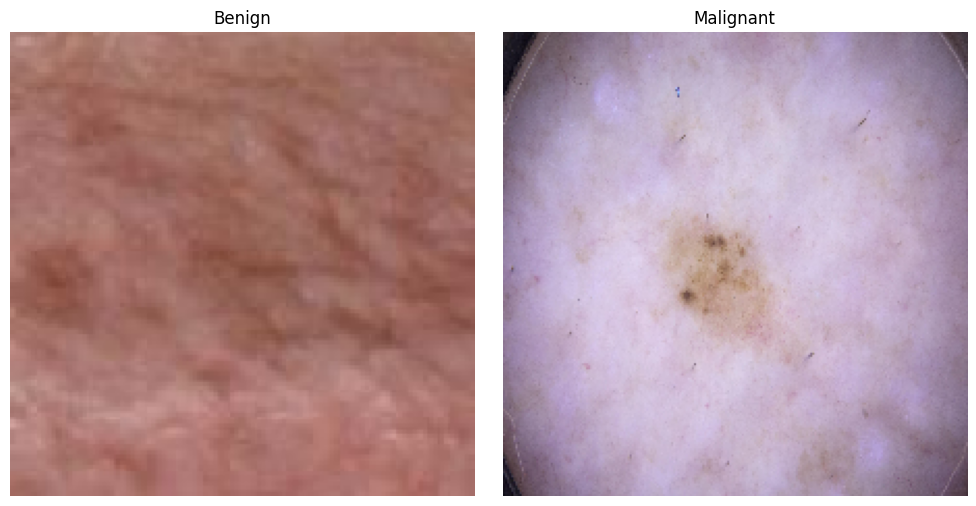

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,934,401 (68.41 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


Starting model training...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 1101s 26s/step - accuracy: 0.5667 - loss: 0.7054 - val_accuracy: 0.7396 - val_loss: 0.5673 - learning_rate: 1.0000e-04
Epoch 2/20
 1/43 ━━━━━━━━━━━━━━━━━━━━ 14:59 21s/step - accuracy: 0.8750 - loss: 0.4760

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


43/43 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - accuracy: 0.8750 - loss: 0.4760 - val_accuracy: 0.5455 - val_loss: 0.7097 - learning_rate: 1.0000e-04
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1096s 25s/step - accuracy: 0.7252 - loss: 0.5621 - val_accuracy: 0.7361 - val_loss: 0.5309 - learning_rate: 1.0000e-04
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6875 - loss: 0.5678 - val_accuracy: 0.6364 - val_loss: 0.5221 - learning_rate: 1.0000e-04
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1089s 25s/step - accuracy: 0.7501 - loss: 0.5436 - val_accuracy: 0.6424 - val_loss: 0.6523 - learning_rate: 1.0000e-04
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.7812 - loss: 0.5335 - val_accuracy: 0.8182 - val_loss: 0.5372 - learning_rate: 1.0000e-04
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1141s 26s/step - accuracy: 0.7369 - loss: 0.5647 - val_accuracy: 0.6806 - val_loss: 0.5874 - learning_rate: 1.0000e-04
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.8750 

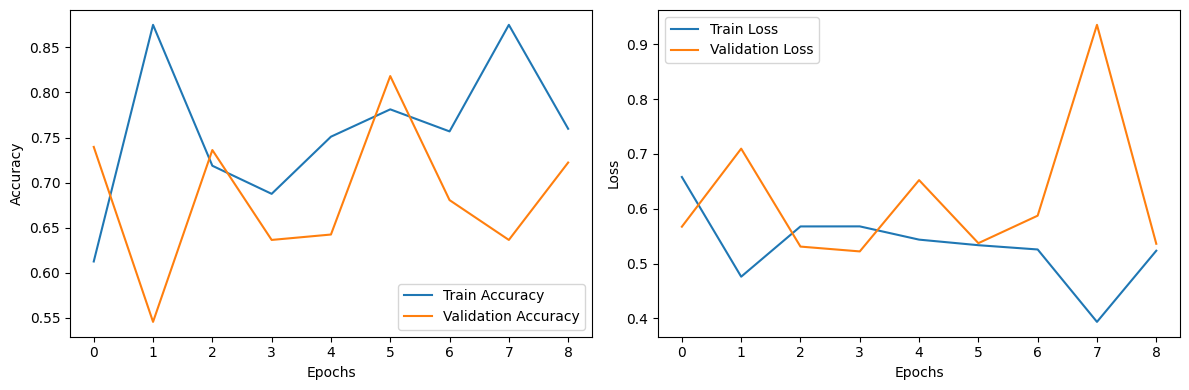


Saving model...
Model architecture saved at: /content/gdrive/MyDrive/models/model_architecture.json
Model weights saved at: /content/gdrive/MyDrive/models/model_weights.weights.h5


In [ ]:
def create_model():
    """Create and compile the model"""
    base_model = tf.keras.applications.VGG16(
        include_top=False,
        input_shape=(224, 224, 3),
        weights='imagenet'
    )
    base_model.trainable = False

    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
        base_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

def plot_training_history(history):
    """Plot training history"""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def save_model_files(model, model_dir):
    """Save model architecture and weights"""
    try:
        architecture_path = os.path.join(model_dir, 'model_architecture.json')
        with open(architecture_path, 'w') as f:
            f.write(model.to_json())
        print(f"Model architecture saved at: {architecture_path}")

        weights_path = os.path.join(model_dir, 'model_weights.weights.h5')  # Ensure correct filename
        model.save_weights(weights_path)
        print(f"Model weights saved at: {weights_path}")

        return True
    except Exception as e:
        print(f"Error saving model: {str(e)}")
        return False

def main():
    X_train, X_val, X_test, y_train, y_val, y_test = load_data()
    visualize_data(X_train, y_train)

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_datagen = ImageDataGenerator()
    val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

    model = create_model()
    model.summary()

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
    ]

    batch_size = 32
    steps_per_epoch = len(X_train) // batch_size
    validation_steps = len(X_val) // batch_size

    print("\nStarting model training...")
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=val_generator,
        epochs=20,
        callbacks=callbacks,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=1
    )

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plot_training_history(history)
    print("\nSaving model...")
    save_model_files(model, MODEL_PATH)

if __name__ == "__main__":
    main()